<a href="https://colab.research.google.com/github/learner197/Research-Project/blob/RP-CAE/opencv_CAE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image as im
#import cv2
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tf.config.run_functions_eagerly(True)


In [3]:
import cv2

In [4]:
image_dir_1 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz')
image_dir_2 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru')
image_dir_3 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TEMPLATE to take images as input

In [ ]:
'''
# TEMPLATE to take images as input

# Set the path to your image folder
folder_path = '/path/to/your/folder'

# Initialize empty lists to store the images and labels
images = []
labels = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        # Resize the image to a fixed size
        img = cv2.resize(img, (28, 28))
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images.append(img)
        labels.append(0) # Replace with your own label
        
# Convert the image and label lists to numpy arrays
images = np.array(images)
labels = np.array(labels)
'''

# Taking images as input

In [9]:
m={
    "05_Walking_towards_radar":1,
   "06_walking_away_from_Radar":2,
   "07_picking_up_an_object":3,
   "08_bending":4,
   "09_sitting":5,
   "10_kneeling":6,
    "11_crawling":7,
   "16_Walking_on_both_toes":8,
   "17_limping_with_right_leg_stiff":9,
   "18_short_steps":10,
   "19_scissors_gait":11
}

In [10]:
images_1=[]
labels_1=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_1.append(img)
        labels_1.append(m[file])
labels_1=np.array(labels_1)
labels_1=np.float32(labels_1)
images_1=np.array(images_1)
images_1=np.float32(images_1)

In [11]:
labels_1[0]

8.0

In [12]:
images_2=[]
labels_2=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_2.append(img)
        labels_2.append(m[file])
labels_2=np.array(labels_2)
labels_2=np.float32(labels_2)
images_2=np.array(images_2)
images_2=np.float32(images_2)

In [13]:
images_3=[]
labels_3=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        #path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        # Read the image using OpenCV and convert to grayscale
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        #print(img)
        try:
          # Resize the image to a fixed size
          img = cv2.resize(img, (64, 64))
          #print(img.shape)
        except:
          break
        # Convert the image to a numpy array
        img = np.array(img)
        # Add the image and label to the lists
        images_3.append(img)
        labels_3.append(m[file])
labels_3=np.array(labels_3)
labels_3=np.float32(labels_3)
images_3=np.array(images_3)
images_3=np.float32(images_3)

# Padding version-1

In [ ]:
''''max_size = np.max([image.shape for image in images_1], axis=0)

# Resize and pad each image to the maximum size
resized_images_1 = tf.image.resize_with_pad(images_1, max_size[0], max_size[1], method='bilinear')''''

In [ ]:
'''resized_images_1.shape,images_1.shape
type(resized_images_1)'''

# Padding version-2

In [ ]:
'''import numpy as np

# Assuming dataset is a numpy array of shape (648, 64, 64)
#dataset = np.random.rand(648, 64, 64)

# Desired output shape after padding
output_shape = (648, 64, 64)

# Calculate the pad amounts for each dimension
pad_amounts = [(output_shape[i] - images_1.shape[i]) // 2 for i in range(3)]

# Apply the padding using the desired padding strategy (e.g. reflect)
padded_dataset_1 = np.pad(images_1, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')
padded_dataset_2 = np.pad(images_2, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')
padded_dataset_3 = np.pad(images_3, [(0, 0), (pad_amounts[1], pad_amounts[1]), (pad_amounts[2], pad_amounts[2])], mode='reflect')


# Verify that the number of images remain the same
print(padded_dataset_1.shape[0])  # Output: 648
'''

In [ ]:
#padded_dataset_1.shape, images_1.shape

In [ ]:
'''images_1=padded_dataset_1
images_2=padded_dataset_2
images_3=padded_dataset_3'''

# Convert data from int datatype to float datatype

In [ ]:
'''resized_images_1=np.float32(resized_images_1)
type(resized_images_1[0][0][0]),type(images_1[0][0][0])'''

In [ ]:
#resized_images_1.shape

In [ ]:
#images_1=np.float32(images_1)

In [ ]:
#labels_1[0]

In [ ]:
#len(labels_1)

In [ ]:
#images_1.shape# total 648 images

In [ ]:
#len(images_1[0])# 28 rows* 28 columns

In [ ]:
#images_1[0][0]# 1st row of 1st image

In [ ]:
#images_1[0]

#Rough

In [ ]:
type(images_1),type(labels_1)

(numpy.ndarray, numpy.ndarray)

In [ ]:
images_1.shape,images_2.shape,images_3.shape

((648, 64, 64), (735, 64, 64), (94, 64, 64))

In [ ]:
images_1# set of all datapoints

array([[[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]],

       ...,

       [[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.

In [ ]:
images_1[647]# 647th datapoint is of size 64*64

array([[14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.]], dtype=float32)

In [ ]:
images_1[0][0] # 1 row of 0th datapoint

array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
      dtype=float32)

In [ ]:
len(images_1[0])

64

In [ ]:
len(images_1[0][0])

64

In [7]:
images_1[0]

array([[14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], dtype=uint8)

In [8]:
labels_1

[]

# Plots

'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

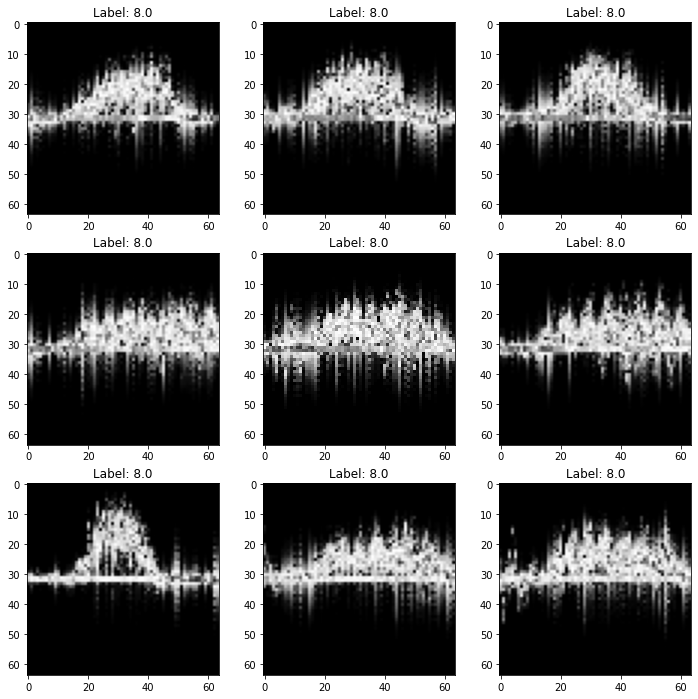

In [49]:
plt.figure(figsize=[12,12])

# Display the first image in training data

for i in range(1,10):
  plt.subplot(3,3,i)
  curr_img = np.reshape(images_1[i], (64,64))
  curr_lbl = labels_1[i]
  plt.imshow(curr_img, cmap='gray')
  plt.title("Label: " + str(curr_lbl))

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

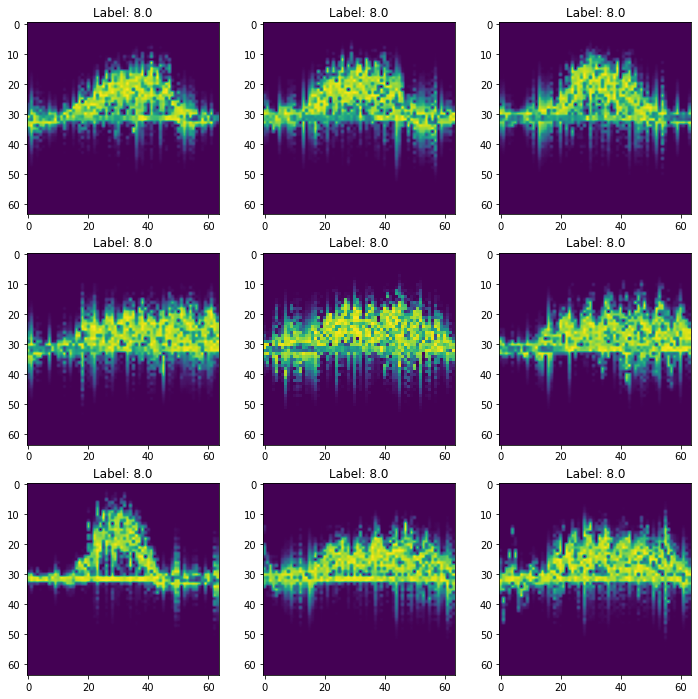

In [ ]:
plt.figure(figsize=[12,12])

# Display the first image in training data

for i in range(1,10):
  plt.subplot(3,3,i)
  curr_img = np.reshape(images_1[i], (64,64))
  curr_lbl = labels_1[i]
  plt.imshow(curr_img)
  plt.title("Label: " + str(curr_lbl))

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


In [ ]:
type(images_1[0][0][0])

numpy.float32

In [ ]:
np.max(images_1)

225.0

In [ ]:
images_1=images_1/np.max(images_1)

In [ ]:
np.max(images_1)

1.0

# Training the model

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(images_1, labels_1, test_size=0.2, random_state=42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(images_2, labels_2, test_size=0.2, random_state=42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(images_3, labels_3, test_size=0.2, random_state=42)

In [17]:
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train_1, y_train_1, test_size=0.2, random_state=42)
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train_2, y_train_2, test_size=0.2, random_state=42)
x_train_3, x_val_3, y_train_3, y_val_3 = train_test_split(x_train_3, y_train_3, test_size=0.2, random_state=42)

In [ ]:
x_train_1[0]

array([[14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.]], dtype=float32)

In [ ]:
y_train_1[0]

array([[14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.]], dtype=float32)

# Converting output variable into an array

In [ ]:
y_train_1=np.array(y_train_1)
y_train_2=np.array(y_train_2)
y_train_3=np.array(y_train_3)

y_val_1=np.array(y_val_1)
y_val_2=np.array(y_val_2)
y_val_3=np.array(y_val_3)

y_test_1=np.array(y_test_1)
y_test_2=np.array(y_test_2)
y_test_3=np.array(y_test_3)

# Shapes of training, testing, validation data

In [ ]:
print(x_train_1.shape)
print(x_val_1.shape)
print(x_test_1.shape)
print(x_train_1.shape[0]+x_val_1.shape[0]+x_test_1.shape[0])
type(x_train_1)

(414, 64, 64)
(104, 64, 64)
(130, 64, 64)
648


numpy.ndarray

In [ ]:
print(len(y_train_1))
print(len(y_val_1))
print(len(y_test_1))
print(len(y_train_1+y_val_1+y_test_1))
type(y_train_1)

414
104
130


ValueError: ignored

In [ ]:
type(y_train_1[0])

numpy.float32

In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[x_train_1.shape[0],x_val_1.shape[0],x_test_1.shape[0]],
   'Xethru':[x_train_2.shape[0],x_val_2.shape[0],x_test_2.shape[0]],
   '24GHZ':[x_train_3.shape[0],x_val_3.shape[0],x_test_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['training_images','validation_images','testing_images']
images_summary

,77GHZ,Xethru,24GHZ
training_images,414,470,60
validation_images,104,118,15
testing_images,130,147,19


# CAE-1

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define the input layer
input_img = Input(shape=(64, 64, 1))

# Encoder
x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (9, 9), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='softmax', padding='same')(x)

# Define the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder.summary()

<IPython.core.display.Javascript object>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        3692

# CAE-2 DATACAMP

In [19]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import keras

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Define the input layer
input_img = Input(shape=(64, 64, 1))

# Encoder
def encoder(input_img):
  x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2),strides=(2,2), padding='same')(x)
  return encoded

# Decoder
def decoder(encoded): 
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, (9, 9), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3), activation='softmax', padding='same')(x)
  return decoded

# Define the model
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy')
#autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
autoencoder.summary()

<IPython.core.display.Javascript object>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        3692

In [ ]:
images_1.shape

(648, 64, 64)

# After CAE

In [ ]:
print(len(x_test_1))
print(len(y_test_1))
print(type(x_test_1))
print(type(y_test_1))
print(y_test_1[0])
print(type(y_test_1[0]))

130
130
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3
<class 'numpy.int64'>


# CAE Training

In [ ]:
x_train_1.shape,y_train_1.shape

((414, 64, 64), (414,))

In [ ]:
y_train_1=y_train_1.reshape(y_train_1.shape[0],1)

In [ ]:
y_train_1.shape

(414, 1)

In [20]:
autoencoder.fit(x_train_1,x_train_1,
          epochs=100, 
          batch_size=16,
          validation_data=(x_val_1,x_val_1))

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
26/26 [==============================] - 36s 1s/step - loss: 11341.9150 - val_loss: 11368.9854
Epoch 2/100
26/26 [==============================] - 31s 1s/step - loss: 11341.9131 - val_loss: 11368.9854
Epoch 3/100
26/26 [==============================] - 31s 1s/step - loss: 11341.9141 - val_loss: 11368.9854
Epoch 4/100
26/26 [==============================] - 40s 2s/step - loss: 11341.9131 - val_loss: 11368.9854
Epoch 5/100
26/26 [==============================] - 33s 1s/step - loss: 11341.9141 - val_loss: 11368.9854
Epoch 6/100
26/26 [==============================] - 31s 1s/step - loss: 11341.9131 - val_loss: 11368.9854
Epoch 7/100
26/26 [==============================] - 40s 2s/step - loss: 11341.9141 - val_loss: 11368.9854
Epoch 8/100
26/26 [==============================] - 31s 1s/step - loss: 11341.9121 - val_loss: 11368.9854
Epoch 9/100
26/26 [==============================] - 34s 1s/step - loss: 11341.9141 - val_loss: 11368.9854
Epoch 10/100
26/26 [=================

In [ ]:
'''autoencoder.fit(x_train_1,y_train_1,
          epochs=10, 
          validation_data=(x_val_1,y_val_1))'''

In [22]:
autoencoder_train_his=autoencoder.history.history
autoencoder_train_his

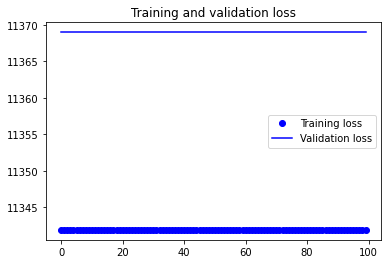

In [25]:
loss = autoencoder.history.history['loss']
val_loss = autoencoder.history.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [24]:
autoencoder.save_weights('autoencoder.h5')


In [41]:
print("Generate predictions for 3 samples")
predictions = autoencoder.predict(x_test_1)
#print("predictions shape:", predictions.shape)
predictions.shape

Generate predictions for 3 samples


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 [==============================] - 3s 520ms/step


(130, 64, 64, 1)

In [42]:
predictions.shape,x_test_1.shape

((130, 64, 64, 1), (130, 64, 64))

In [47]:
predictions[0].shape,x_test_1[0].shape


((64, 64, 1), (64, 64))

In [50]:
x_test_1[0],predictions[0]

(array([[14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        ...,
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.],
        [14., 14., 14., ..., 14., 14., 14.]], dtype=float32),
 array([[[0.99999994],
         [0.99999994],
         [0.99999994],
         ...,
         [0.99999994],
         [0.99999994],
         [0.99999994]],
 
        [[0.99999994],
         [0.99999994],
         [0.99999994],
         ...,
         [0.99999994],
         [0.99999994],
         [0.99999994]],
 
        [[0.99999994],
         [0.99999994],
         [0.99999994],
         ...,
         [0.99999994],
         [0.99999994],
         [0.99999994]],
 
        ...,
 
        [[0.99999994],
         [0.99999994],
         [0.99999994],
         ...,
         [0.99999994],
         [0.99999994],
         [0.99999994]],
 
        [[0.99999994],
         [0.99999994],
         [0.9999999

'# Display the first image in testing data\nplt.subplot(122)\ncurr_img = np.reshape(test_data[10], (28,28))\ncurr_lbl = test_labels[10]\nplt.imshow(curr_img, cmap=\'gray\')\nplt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'

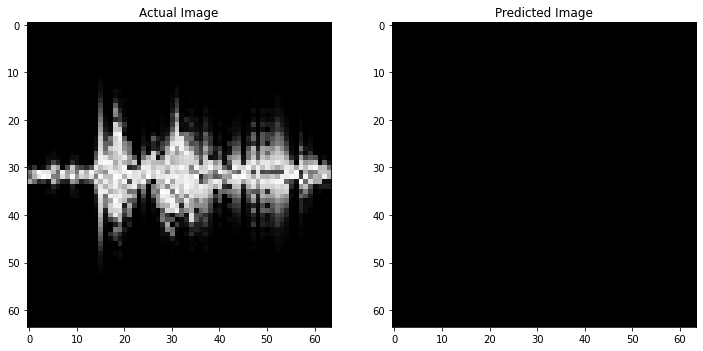

In [44]:
plt.figure(figsize=[12,12])

plt.subplot(1,2,1)
plt.imshow(x_test_1[1], cmap='gray')
plt.title("Actual Image")
  #curr_img = np.reshape(images_1[i], (64,64))
  #curr_lbl = labels_1[i]
  #plt.title("Label: " + str(curr_lbl))
plt.subplot(1,2,2)
plt.imshow(predictions[1], cmap='gray')
plt.title("Predicted Image")

'''# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")'''


# After CAE Training

# Way-1

In [30]:
encoded_image=encoder(input_img)
model=keras.Model(input_img,encoded_image)
x = layers.Flatten()(model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(model.input,x)
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        2624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0   

In [31]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['accuracy'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [ ]:
model1.fit(x_train_1,y_train_1, validation_data = (x_val_1,y_val_1), epochs = 100)


In [32]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test_1, y_test_1)
print("test loss, test acc:", results)

Evaluate on test data


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored

# Way-2 Datacamp

# Rough-2

In [ ]:
'''
encoder = keras.Model(input_img, encoded)
x = layers.Flatten()(encoder.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(11, activation='softmax')(x)
model1=tf.keras.models.Model(encoder.input,x)
model1.summary()
#encoded_imgs=encoder.predict()
'''

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])
#model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [ ]:
model1.fit(x_train_1,y_train_1, validation_data = (x_val_1,y_val_1), epochs = 100)
'''
autoencoder.fit(train_images_1,
          epochs=100, 
          batch_size=16,
          validation_data=val_images_1)
'''

Epoch 1/100


ValueError: ignored

In [ ]:
print(max(labels_1),min(labels_1))
print(max(y_train_1),min(y_train_1))

11 1
11 1


# End